# Preprocessing

## Import

In [104]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

%run ../scripts/save_utils.py

## Cleaning

First of all, let's look at the dataset again:

In [105]:
df = load_data('../save_files/df.pkl')

We don't really need the links to the article since I'm not going to extract any additional information, so it makes sense to delete this column:

In [106]:
df.drop('article_link', axis=1, inplace=True)
save_data('../save_files/df.pkl', df)

All variables have been successfully saved to ../save_files/df.pkl.


## Tokenization

Since the data is good as is, we jump straight up to the tokenization.

In [107]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

Before we actualy tokenize the data, we need to split it into train, validation and test sets:

In [108]:
x_temp, x_test, y_temp, y_test = train_test_split(df['headline'], df['is_sarcastic'],
                                                  test_size=0.2, stratify=df['is_sarcastic'],
                                                  shuffle=True, random_state=73)

In [109]:
x_train, x_val, y_train, y_val = train_test_split(x_temp, y_temp,
                                                  test_size=0.25, stratify=y_temp,
                                                  shuffle=True, random_state=73)

Now we have **train set** consisting of **60%** of the initial data and **validation and test sets** each containing **20%** of the residual data.  
  
Now we will tokenize and pad the data. Note that we should call fit the tokenizer only to **train** data to prevent data leakage:

In [110]:
headline_tokenizer = Tokenizer()
headline_tokenizer.fit_on_texts(x_train)
save_data('../save_files/tokenizer.pkl', headline_tokenizer)
data_vocabulary = headline_tokenizer.word_counts

All variables have been successfully saved to ../save_files/tokenizer.pkl.


In [111]:
x_train_tokenized = headline_tokenizer.texts_to_sequences(x_train)
x_train_preprocessed = pad_sequences(x_train_tokenized)

x_val_tokenized = headline_tokenizer.texts_to_sequences(x_val)
x_val_preprocessed = pad_sequences(x_val_tokenized)

x_test_tokenized = headline_tokenizer.texts_to_sequences(x_test)
x_test_preprocessed = pad_sequences(x_test_tokenized)

We need to ensure that the length of sequences in train, val and test data is the same:

In [112]:
print('train: ', x_train_preprocessed.shape)
print('val:   ', x_val_preprocessed.shape)
print('test:  ', x_test_preprocessed.shape)

train:  (17171, 152)
val:    (5724, 25)
test:   (5724, 32)


The size must be consistent throughout all sets, so we apply additional padding:

In [113]:
max_len = max(x_train_preprocessed.shape[1], x_val_preprocessed.shape[1], x_test_preprocessed.shape[1])

x_train_preprocessed = pad_sequences(x_train_preprocessed, maxlen=max_len, padding='post')
x_val_preprocessed = pad_sequences(x_val_preprocessed, maxlen=max_len, padding='post')
x_test_preprocessed = pad_sequences(x_test_preprocessed, maxlen=max_len, padding='post')

And now we save it for later use in neural networks:

In [114]:
save_data('../save_files/processed_data.pkl', x_train_preprocessed, y_train, x_val_preprocessed, y_val, x_test_preprocessed, y_test)

All variables have been successfully saved to ../save_files/processed_data.pkl.


Let's plot the top-10 most occuring words:

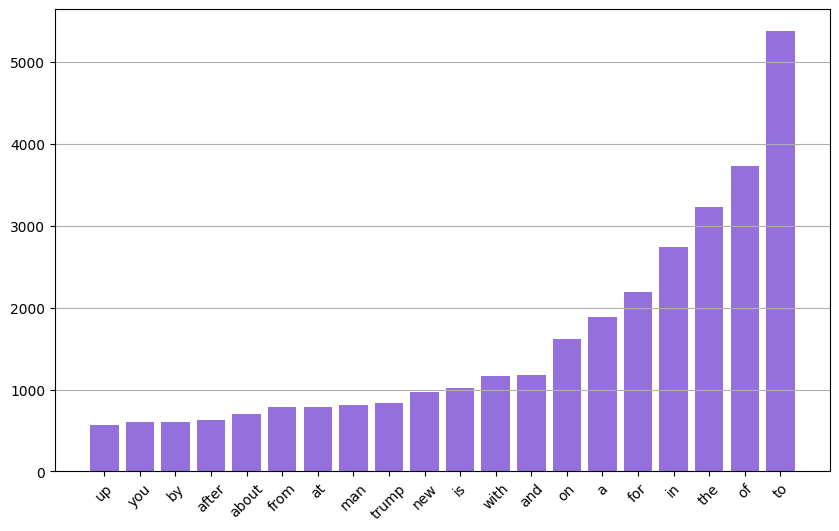

In [115]:
df_dict_sorted = sorted(data_vocabulary.items(), key=lambda x: x[1])
most_words = [x for x, y in df_dict_sorted[-20:]]
most_indices = [y for x, y in df_dict_sorted[-20:]]

plt.figure(figsize=(10, 6))
plt.bar(most_words, most_indices, color='mediumpurple')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show();